In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


def simple_moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

def decompose_series(series, return_period=102):
  res = sm.tsa.seasonal_decompose(series, period=return_period)
  fig = res.plot()
  fig.set_figheight(8)
  fig.set_figwidth(15)
  plt.show()


def plot_autocorrelation(series, lags=30):
    plot_acf(series, lags=lags)
    plt.show()

def apply_boxcox_transformation(series):
    transformed_series, lam = boxcox(series)
    return transformed_series, lam



Ce bloc importe diverses bibliothèques et définit plusieurs fonctions qui seront utilisées pour l'analyse et la visualisation des séries temporelles.
Numpy: Pour les opérations numériques.
Pandas: Pour la manipulation des données.
Matplotlib: Pour tracer des graphiques.
yFinance: Pour récupérer des données financières.
statsmodels.tsa.seasonal: Pour la décomposition saisonnière des séries temporelles.
statsmodels.graphics.tsaplots: Pour tracer la fonction d'autocorrélation.
scipy.stats: Pour la transformation Box-Cox.
sklearn.preprocessing: Pour la normalisation des données.
statsmodels.api: Pour l'analyse des séries temporelles.

Ainsi nous implémentons 4 fonction qui vont nous être utile pour décomposer et analyser la série temporelle.


In [3]:
cac40_data = pd.read_csv('CAC.csv', sep=',')
time_series_data = cac40_data['close']

In [4]:
cac40_data = cac40_data.drop(cac40_data.index[-1])
print(cac40_data)


               date      time  close
0        2015-01-02  09:00:00   4291
1        2015-01-02  09:00:15   4302
2        2015-01-02  09:00:30   4302
3        2015-01-02  09:00:45   4300
4        2015-01-02  09:01:00   4300
...             ...       ...    ...
3236566  2021-03-31  17:34:00   6063
3236567  2021-03-31  17:34:15   6064
3236568  2021-03-31  17:34:30   6067
3236569  2021-03-31  17:34:45   6061
3236570  2021-03-31  17:35:00   6065

[3236571 rows x 3 columns]


Ces lignes de codes permettent d’extraire les prix de fermeture du CAC-40 et de décomposer la série temporelles en tendance, saisonnalité et résidus et en affiche les composants.


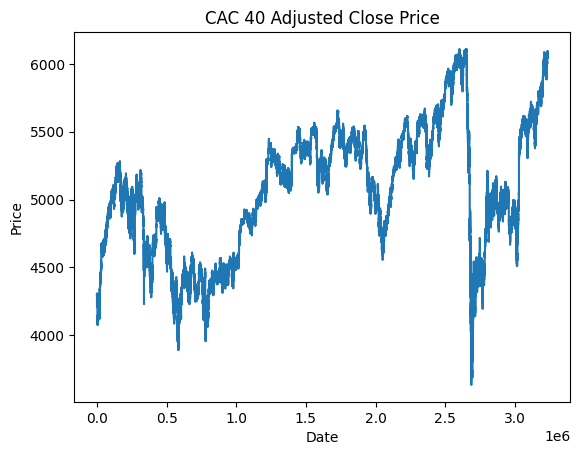

In [5]:
plt.plot(cac40_data["close"])
plt.title('CAC 40 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


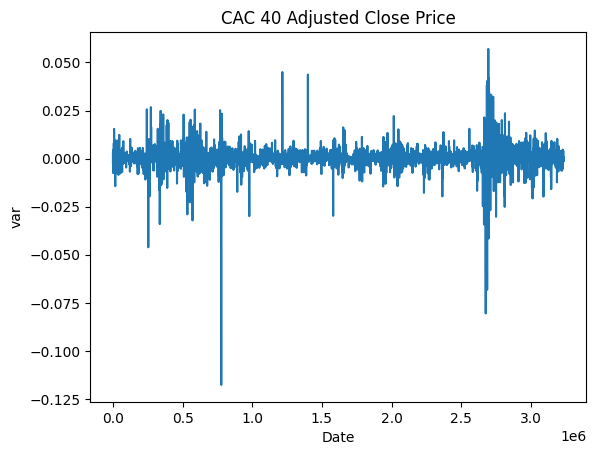

In [6]:
return_period = 1
var = np.log(cac40_data.loc[:, ('close')]).diff(return_period).shift(-return_period)
plt.plot(var)
plt.title('CAC 40 Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('var')
plt.show()


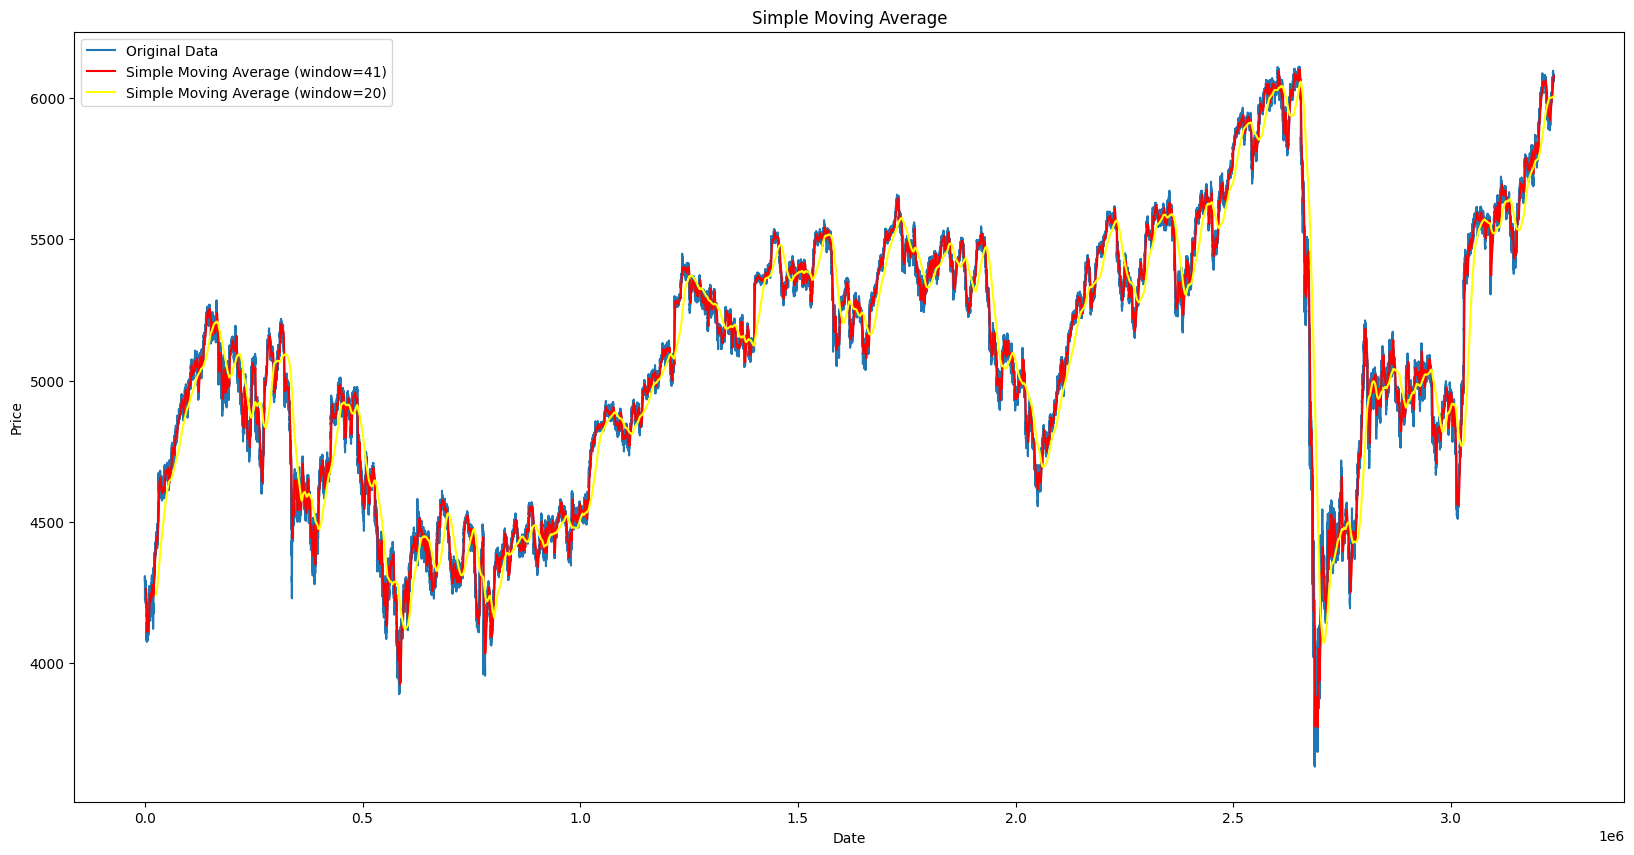

In [7]:
sma12 = simple_moving_average(cac40_data["close"],2063) # jour
sma9600 = simple_moving_average(cac40_data["close"],2063*12) # mois

plt.figure(figsize=(20, 10))
plt.plot(cac40_data["close"], label='Original Data')
plt.plot(sma12, label='Simple Moving Average (window=41)', color='red')
plt.plot(sma9600, label='Simple Moving Average (window=20)', color='yellow')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Ce code calcule et affiche les moyennes mobiles simples de la série temporelle des prix de clôture du CAC 40 sur des fenêtres de 2063 à 24756 jours. Le graphique résultant montre les données originales, la moyenne mobile sur une fenêtre journalière (2063 jours) et une autre sur une fenêtre mensuelle approximative (24756 jours).


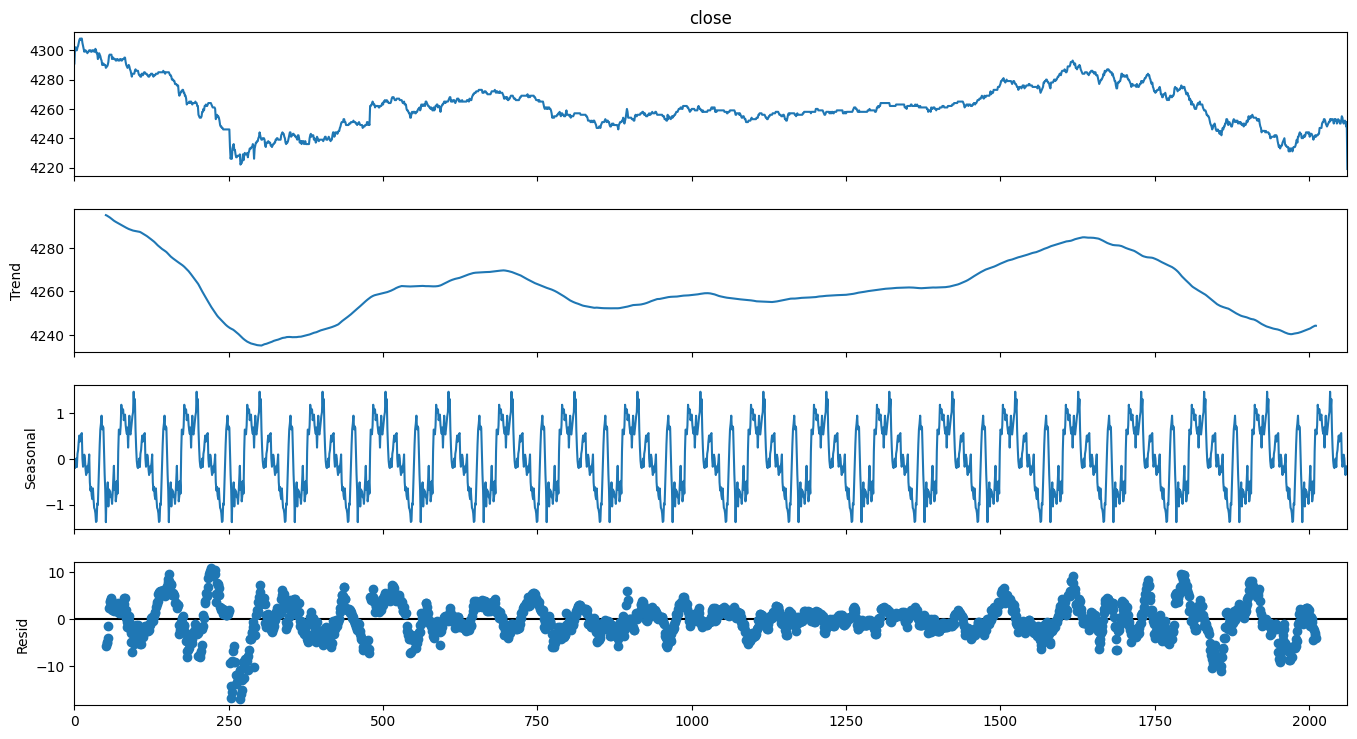

In [8]:
decompose_series(cac40_data["close"][:2063])

Cette fonction applique une décomposition saisonnière à la série temporelle des prix de clôture pour les 2063 premiers jours.


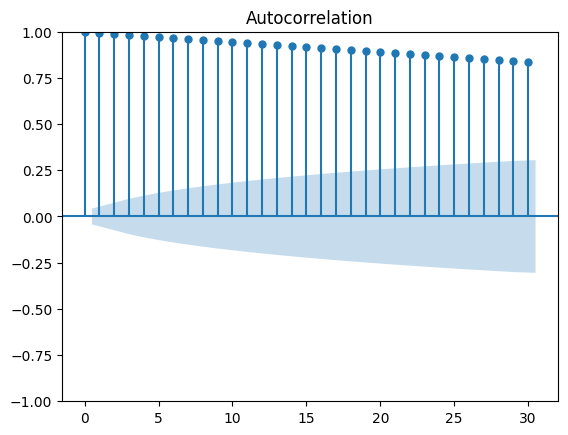

In [9]:
plot_autocorrelation(cac40_data["close"][:2063])

Cette fonction trace la fonction d'autocorrélation pour les 2063 premiers jours des prix de clôture.
Le graphique affiche les corrélations des valeurs de la série temporelle avec leurs propres valeurs décalées sur un certain nombre de décalages.

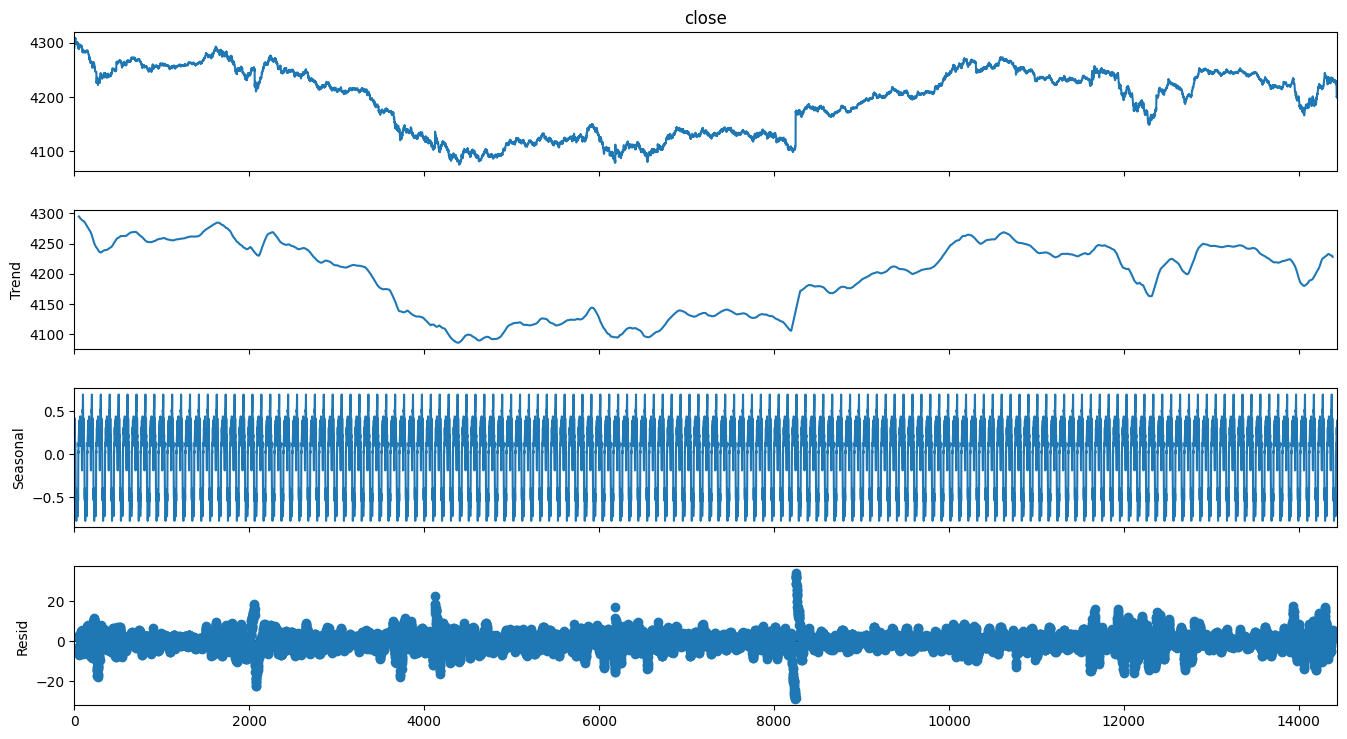

In [10]:
Cette fonction applique une décomposition saisonnière à la série temporelle des prix de clôture pour les 14441 premiers jours (2063 jours * 7)

Cette fonction applique une décomposition saisonnière à la série temporelle des prix de clôture pour les 14441 premiers jours par semaine (2063 jours * 7).

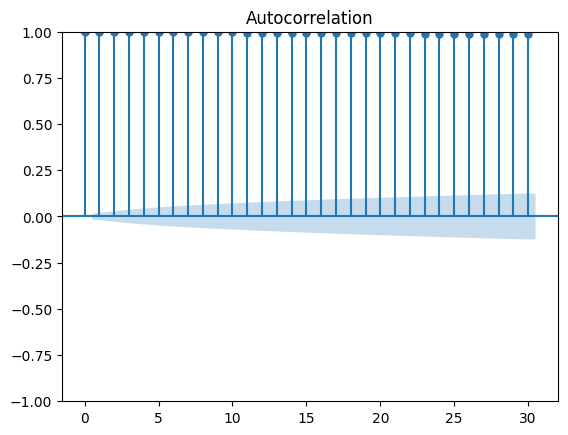

In [11]:
plot_autocorrelation(cac40_data["close"][:2063*7])

Cette fonction trace la fonction d'autocorrélation pour les 14441 premiers jours des prix de clôture.
Le graphique affiche les corrélations des valeurs de la série temporelle avec leurs propres valeurs décalées sur un certain nombre décalages.

In [12]:
import pandas as pd
return_period = 1

df1 = pd.read_csv("CAC.csv", usecols=["date", "time", "close"])
df3 = pd.read_csv("USA500.csv", usecols=["date", "time", "Close"])
df4 = pd.read_csv("USATECH.csv", usecols=["date", "time", "Close"])

date_format = "%Y-%m-%d,%H:%M:%S"

df1["datetime"] = pd.to_datetime(df1["date"] + " " + df1["time"])
df3["datetime"] = pd.to_datetime(df3["date"] + " " + df3["time"])
df4["datetime"] = pd.to_datetime(df4["date"] + " " + df4["time"])

result_df = pd.merge(df1, df3, on="datetime", how="outer")
result_df = pd.merge(result_df, df4, on="datetime", how="outer")

result_df = result_df[(result_df["datetime"] >= "2015-01-02 09:00:00") & (result_df["datetime"] <= "2021-03-31 17:35:00")]

result_df = result_df.set_index('datetime').resample('5T').nearest().reset_index()

result_df = result_df.drop(['time_x', 'date_x', 'time_y', 'date_y', 'time', 'date'], axis=1)


import numpy as np

var_cac40 = np.log(result_df['close']).diff(return_period).shift(-return_period)
var_usa500 = np.log(result_df['Close_x']).diff(return_period).shift(-return_period)
var_usatech = np.log(result_df['Close_y']).diff(return_period).shift(-return_period)

result_df['var_cac40'] = var_cac40
result_df['var_usa500'] = var_usa500
result_df['var_usatech'] = var_usatech



import pandas as pd
import numpy as np
import ta

result_df['SMA'] = ta.trend.sma_indicator(result_df['close'], window=102)
result_df['EMA'] = ta.trend.ema_indicator(result_df['close'], window=102)
result_df['WMA'] = ta.trend.wma_indicator(result_df['close'], window=102)
result_df['TRIMA'] = result_df['close'].rolling(window=102, min_periods=1).mean()
result_df['DEMA'] = 2 * result_df['close'].ewm(span=102).mean() - result_df['close'].ewm(span=102).mean().ewm(span=102).mean()

result_df.fillna(method='ffill', inplace=True)
result_df.interpolate(method='linear', inplace=True)
result_df.fillna(method='bfill', inplace=True)

print(result_df)


                  datetime   close   Close_x    Close_y  var_cac40  \
0      2015-01-02 09:00:00  4291.0  2064.900   4252.572   0.001863   
1      2015-01-02 09:05:00  4299.0  2065.100   4253.786  -0.000233   
2      2015-01-02 09:10:00  4298.0  2066.400   4256.289  -0.000233   
3      2015-01-02 09:15:00  4297.0  2065.100   4253.031  -0.000698   
4      2015-01-02 09:20:00  4294.0  2064.900   4253.013  -0.001865   
...                    ...     ...       ...        ...        ...   
656739 2021-03-31 17:15:00  6073.0  3991.939  13152.059   0.000165   
656740 2021-03-31 17:20:00  6074.0  3991.242  13153.119   0.000165   
656741 2021-03-31 17:25:00  6075.0  3992.436  13159.789  -0.001153   
656742 2021-03-31 17:30:00  6068.0  3993.439  13157.269  -0.000495   
656743 2021-03-31 17:35:00  6065.0  3991.954  13148.699  -0.000495   

        var_usa500  var_usatech          SMA          EMA          WMA  \
0         0.000097     0.000285  4262.127451  4265.656601  4261.523891   
1         0

Les données des trois indices sont chargées à partir de fichiers CSV et stockées dans des DataFrames.

Nous convertissons colonnes de date et d'heure en objets datetime et les combinons pour former une seule colonne de date/heure. Ensuite, les données des trois indices sont fusionnées en une seule DataFrame en utilisant la colonne de date/heure comme clé.

On ne conserve que les données comprises entre le 2 janvier 2015 à 9h00 et le 31 mars 2021 à 17h35 pour eviter d'avoir trop de valeurs.

On rééchantillonne les données à une fréquence de 5 minutes, en utilisant la valeur la plus proche pour les périodes de temps manquantes.

Les variations logarithmiques des prix de clôture sont calculées pour chaque indice et ajoutées à la dataFrame.

Nous calculons plusieurs indicateurs techniques sont calculés pour les prix de clôture du CAC 40 :

Moyenne mobile simple (SMA)

Moyenne mobile exponentielle (EMA)

Moyenne mobile pondérée (WMA)

Moyenne mobile triangulaire (TRIMA)

Double moyenne mobile exponentielle (DEMA)

Les valeurs manquantes sont remplacées par la derniere valeur enregistrée.

On termine en affichant la dataFrame résultante est imprimée à la sortie standard.

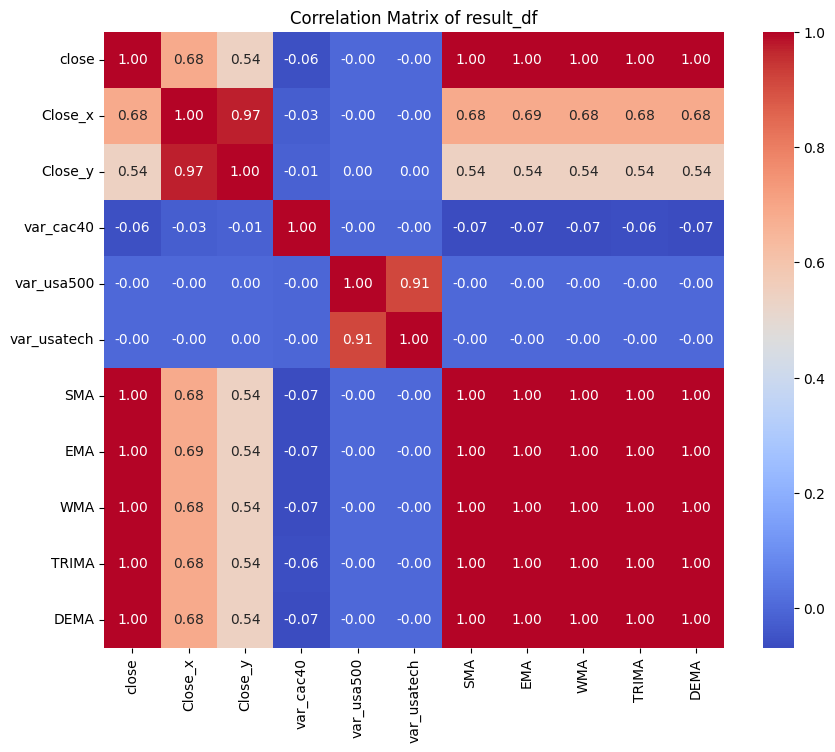

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = result_df.drop('datetime',axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of result_df')
plt.show()


Cette heatmap permet de visualiser rapidement les corrélations entre les différentes variables numériques de la DataFrame . Les cellules colorées indiquent le degré de corrélation entre les paires de variables allant de 0 à 1 : plus la couleur est foncée (vers le rouge), plus la corrélation est forte, et plus la couleur est claire (vers le bleu), plus la corrélation est faible. Ici par exemple on peut constater que les idicateurs de moyenne sont tous corrélés les uns aux autres.  

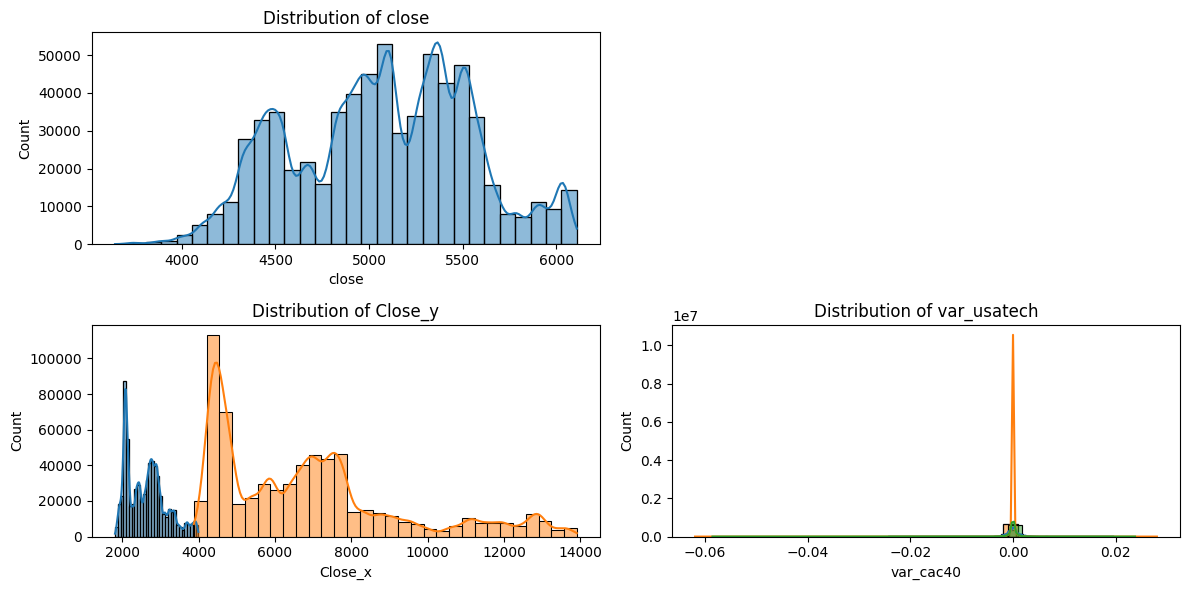

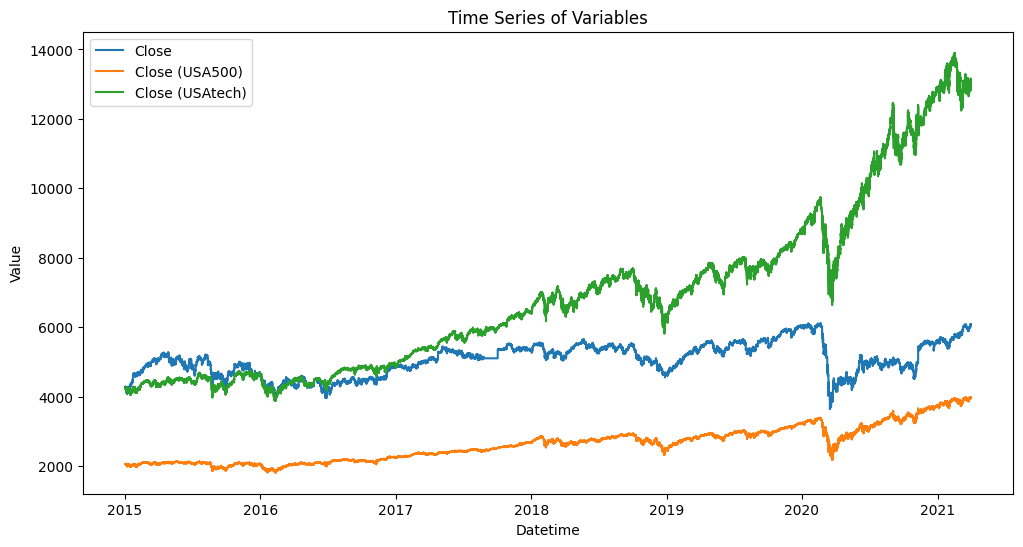

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(result_df['close'], bins=30, kde=True)
plt.title('Distribution of close')

plt.subplot(2, 2, 3)
sns.histplot(result_df['Close_x'], bins=30, kde=True)
plt.title('Distribution of Close_x')

plt.subplot(2, 2, 3)
sns.histplot(result_df['Close_y'], bins=30, kde=True)
plt.title('Distribution of Close_y')

plt.subplot(2, 2, 4)
sns.histplot(result_df['var_cac40'], bins=30, kde=True)
plt.title('Distribution of var_cac40')

plt.subplot(2, 2, 4)
sns.histplot(result_df['var_usa500'], bins=30, kde=True)
plt.title('Distribution of var_usa500')

plt.subplot(2, 2, 4)
sns.histplot(result_df['var_usatech'], bins=30, kde=True)
plt.title('Distribution of var_usatech')

plt.tight_layout()
plt.show()

# Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(result_df['datetime'], result_df['close'], label='Close')
plt.plot(result_df['datetime'], result_df['Close_x'], label='Close (USA500)')
plt.plot(result_df['datetime'], result_df['Close_y'], label='Close (USAtech)')
plt.title('Time Series of Variables')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.show()

Ces visualisations aident à comprendre la distribution des données pour chaque variable ainsi que l'évolution des valeurs au fil du temps.


In [ ]:
sns.pairplot(result_df[['close', 'Close_x', 'Close_y', 'var_cac40','var_usa500','var_usatech']])
plt.title('Pairplot of Variables')
plt.show()
print("\nMissing values in the DataFrame:")
print(result_df.isnull().sum())
print("\nNumber of duplicated rows in the DataFrame:", result_df.duplicated().sum())


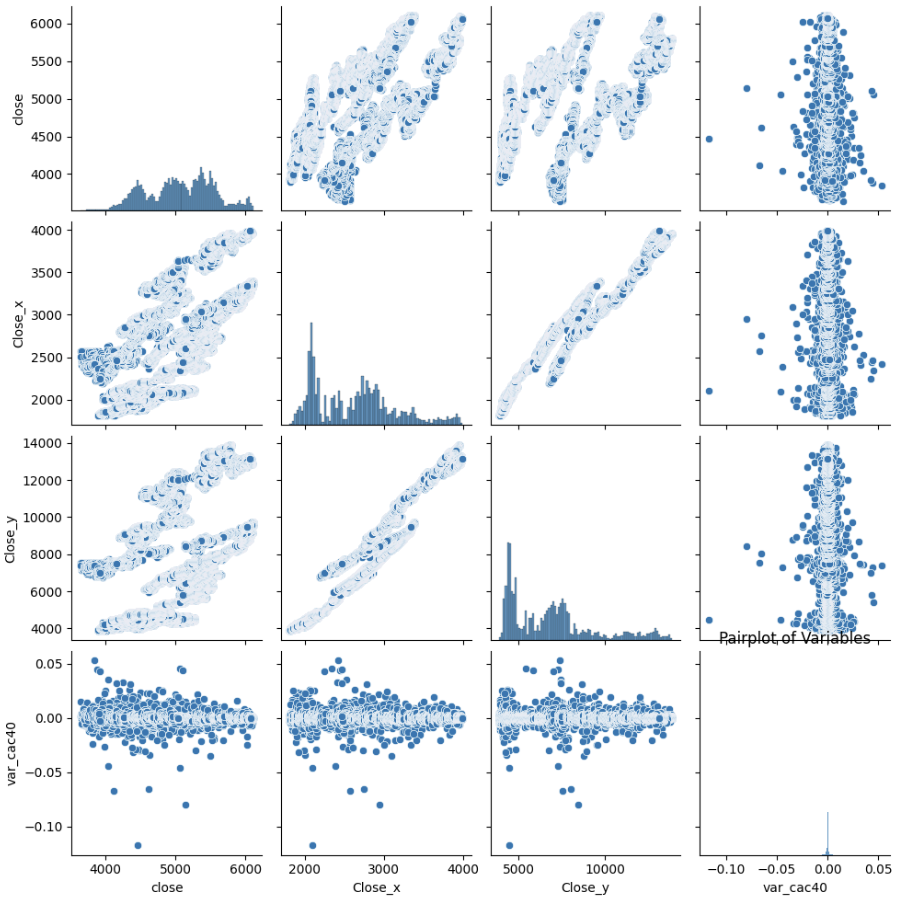

In [ ]:
result_df.to_csv('desktop/data.csv', index=False)